In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
data = np.genfromtxt('./ASTR19_F24_group_project_data.txt', dtype=[('day', 'i8'), ('time', 'U6'), ('height', 'f8')])

def tide_model(x, a, b, c, d, e, f, g): 
    return (a * np.sin(b * x + c)) + (d * np.sin(e * x + f)) + g 

def time_to_hours(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours + minutes / 60.0

t_numeric = np.array([time_to_hours(time) for time in data['time']])
h = data['height']

params = [1.0, 1.0, 0.0, 1.0, 0.5, 0.0, 0.0]

residuals = h - tide_model(t_numeric, *params)

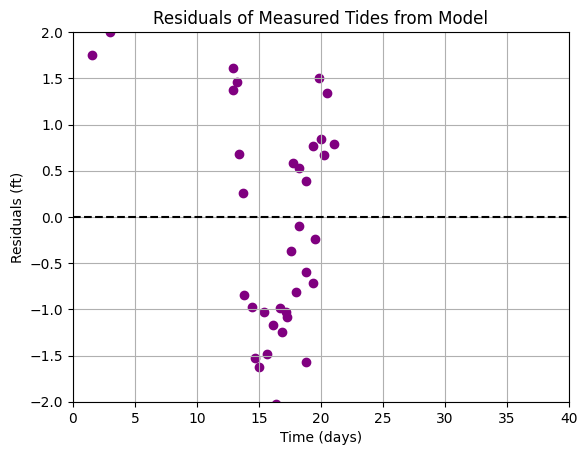

In [49]:
plt.scatter(t, residuals, color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.ylim(-2, 2)
plt.xlim(0, 40)
plt.xlabel('Time (days)')
plt.ylabel('Residuals (ft)')
plt.title('Residuals of Measured Tides from Model')
plt.grid(True)
plt.show()

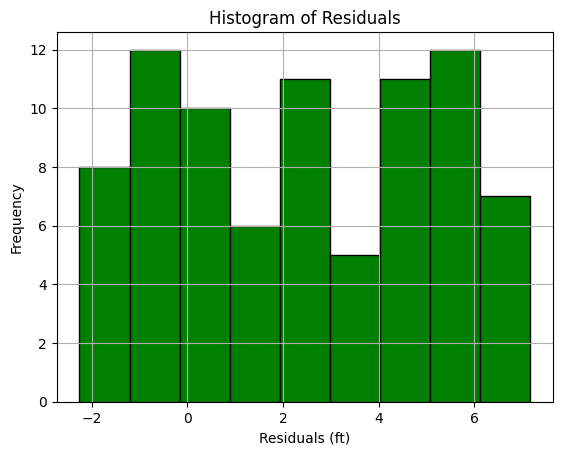

In [50]:
bins = int(np.sqrt(len(residuals)))
plt.hist(residuals, bins=bins, color='green', edgecolor='black')
plt.xlabel('Residuals (ft)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.savefig('residuals_histogram.pdf')
plt.show()

In [43]:
std_residuals = np.std(residuals)
print(f"Standard deviation of residuals: {std_residuals:.2f} ft")

experimental_error = 0.25  
intrinsic_scatter = np.sqrt(std_residuals**2 - experimental_error**2)
print(f"Intrinsic scatter in the data: {intrinsic_scatter:.2f} ft")

Standard deviation of residuals: 2.77 ft
Intrinsic scatter in the data: 2.76 ft
